In [124]:
import pandas as pd
import sqlite3

conexao = sqlite3.connect('..\\Dados\\db\\olist.db')

with open('..\\sql\\queries.sql','r') as dados:
    query = dados.read()

df = pd.read_sql(query,conexao)
df.head(10)

,order_id,product_id,valor_final,categoria,customer_id,customer_state,order_purchase_timestamp,order_estimated_delivery_date,order_delivered_customer_date
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,72.19,cool_stuff,3ce436f183e68e07877b285a838db11a,RJ,2017-09-13 08:59:02,2017-09-29 00:00:00,2017-09-20 23:43:48
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,259.83,pet_shop,f6dd3ec061db4e3987629fe6b26e5cce,SP,2017-04-26 10:53:06,2017-05-15 00:00:00,2017-05-12 16:04:24
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,216.87,moveis_decoracao,6489ae5e4333f3693df5ad4372dab6d3,MG,2018-01-14 14:33:31,2018-02-05 00:00:00,2018-01-22 13:19:16
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,25.78,perfumaria,d4eb9395c8c0431ee92fce09860c5a06,SP,2018-08-08 10:00:35,2018-08-20 00:00:00,2018-08-14 13:32:39
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,218.04,ferramentas_jardim,58dbd0b2d70206bf40e62cd34e84d795,SP,2017-02-04 13:57:51,2017-03-17 00:00:00,2017-03-01 16:42:31
5,00048cc3ae777c65dbb7d2a0634bc1ea,ef92defde845ab8450f9d70c526ef70f,34.59,utilidades_domesticas,816cbea969fe5b689b39cfc97a506742,MG,2017-05-15 21:42:34,2017-06-06 00:00:00,2017-05-22 13:44:35
6,00054e8431b9d7675808bcb819fb4a32,8d4f2bb7e93e6710a28f34fa83ee7d28,31.75,telefonia,32e2e6ab09e778d99bf2e0ecd4898718,SP,2017-12-10 11:53:48,2018-01-04 00:00:00,2017-12-18 22:03:38
7,000576fe39319847cbb9d288c5617fa6,557d850972a7d6f792fd18ae1400d9b6,880.75,ferramentas_jardim,9ed5e522dd9dd85b4af4a077526d8117,SP,2018-07-04 12:08:27,2018-07-25 00:00:00,2018-07-09 14:04:07
8,0005a1a1728c9d785b8e2b08b904576c,310ae3c140ff94b03219ad0adc3c778f,157.60,beleza_saude,16150771dfd4776261284213b89c304e,SP,2018-03-19 18:40:33,2018-03-29 00:00:00,2018-03-29 18:17:31
9,0005f50442cb953dcd1d21e1fb923495,4535b0e1091c278dfd193e5a1d63b39f,65.39,livros_tecnicos,351d3cb2cee3c7fd0af6616c82df21d3,SP,2018-07-02 13:59:39,2018-07-23 00:00:00,2018-07-04 17:28:31


In [125]:
df.info()
# É necessário corrigir o Dtype de algumas colunas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102425 entries, 0 to 102424
Data columns (total 9 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       102425 non-null  object 
 1   product_id                     102425 non-null  object 
 2   valor_final                    102425 non-null  float64
 3   categoria                      100965 non-null  object 
 4   customer_id                    100196 non-null  object 
 5   customer_state                 100196 non-null  object 
 6   order_purchase_timestamp       100196 non-null  object 
 7   order_estimated_delivery_date  100196 non-null  object 
 8   order_delivered_customer_date  100188 non-null  object 
dtypes: float64(1), object(8)
memory usage: 7.0+ MB


In [126]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
df['categoria'] = df['categoria'].astype('category')
df['customer_state'] = df['customer_state'].astype('category')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102425 entries, 0 to 102424
Data columns (total 9 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       102425 non-null  object        
 1   product_id                     102425 non-null  object        
 2   valor_final                    102425 non-null  float64       
 3   categoria                      100965 non-null  category      
 4   customer_id                    100196 non-null  object        
 5   customer_state                 100196 non-null  category      
 6   order_purchase_timestamp       100196 non-null  datetime64[ns]
 7   order_estimated_delivery_date  100196 non-null  datetime64[ns]
 8   order_delivered_customer_date  100188 non-null  datetime64[ns]
dtypes: category(2), datetime64[ns](3), float64(1), object(3)
memory usage: 5.7+ MB


,order_id,product_id,valor_final,categoria,customer_id,customer_state,order_purchase_timestamp,order_estimated_delivery_date,order_delivered_customer_date
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,72.19,cool_stuff,3ce436f183e68e07877b285a838db11a,RJ,2017-09-13 08:59:02,2017-09-29,2017-09-20 23:43:48
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,259.83,pet_shop,f6dd3ec061db4e3987629fe6b26e5cce,SP,2017-04-26 10:53:06,2017-05-15,2017-05-12 16:04:24
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,216.87,moveis_decoracao,6489ae5e4333f3693df5ad4372dab6d3,MG,2018-01-14 14:33:31,2018-02-05,2018-01-22 13:19:16
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,25.78,perfumaria,d4eb9395c8c0431ee92fce09860c5a06,SP,2018-08-08 10:00:35,2018-08-20,2018-08-14 13:32:39
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,218.04,ferramentas_jardim,58dbd0b2d70206bf40e62cd34e84d795,SP,2017-02-04 13:57:51,2017-03-17,2017-03-01 16:42:31


In [127]:
df.describe()

,valor_final,order_purchase_timestamp,order_estimated_delivery_date,order_delivered_customer_date
count,102425.000000,100196,100196,100188
mean,154.684435,2018-01-02 00:12:45.685346816,2018-01-25 18:56:40.087827968,2018-01-14 11:55:25.296991744
min,7.280000,2016-09-15 12:16:38,2016-10-04 00:00:00,2016-10-11 13:46:32
25%,60.000000,2017-09-14 09:43:54,2017-10-05 00:00:00,2017-09-25 22:08:25.750000128
50%,101.600000,2018-01-20 16:05:14,2018-02-16 00:00:00,2018-02-02 16:07:39.500000
75%,170.190000,2018-05-05 21:13:03,2018-05-28 00:00:00,2018-05-15 23:32:03.249999872
max,13664.080000,2018-08-29 15:00:37,2018-10-25 00:00:00,2018-10-17 13:22:46
std,214.501057,NaN,NaN,NaN


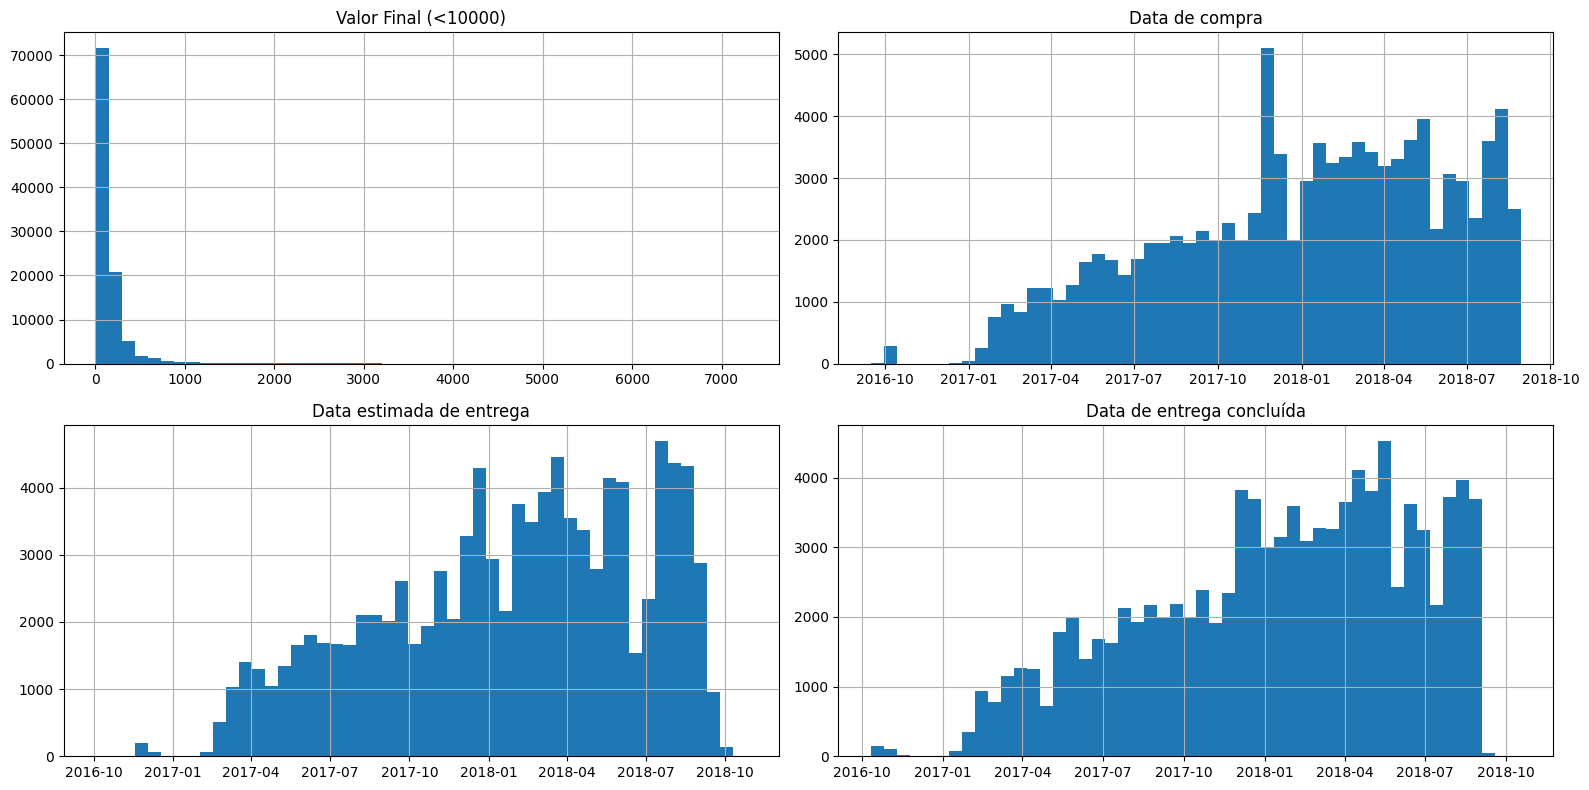

In [128]:
import matplotlib.pyplot as plt
#Distribuições das colunas numéricas

fig, axs = plt.subplots(2, 2, figsize=(16,8))

df[df['valor_final'] < 10000]['valor_final'].hist(bins=50, ax=axs[0,0])
#Escolhe-se valores abaixo de 10000, pois há um único outlier válido distorcendo as distribuições
axs[0,0].set_title('Valor Final (<10000)')

df['order_purchase_timestamp'].hist(bins=50, ax=axs[0,1])
axs[0,1].set_title('Data de compra')

df['order_estimated_delivery_date'].hist(bins=50, ax=axs[1,0])
axs[1,0].set_title('Data estimada de entrega')

df['order_delivered_customer_date'].hist(bins=50, ax=axs[1,1])
axs[1,1].set_title('Data de entrega concluída')

plt.tight_layout()
plt.show()

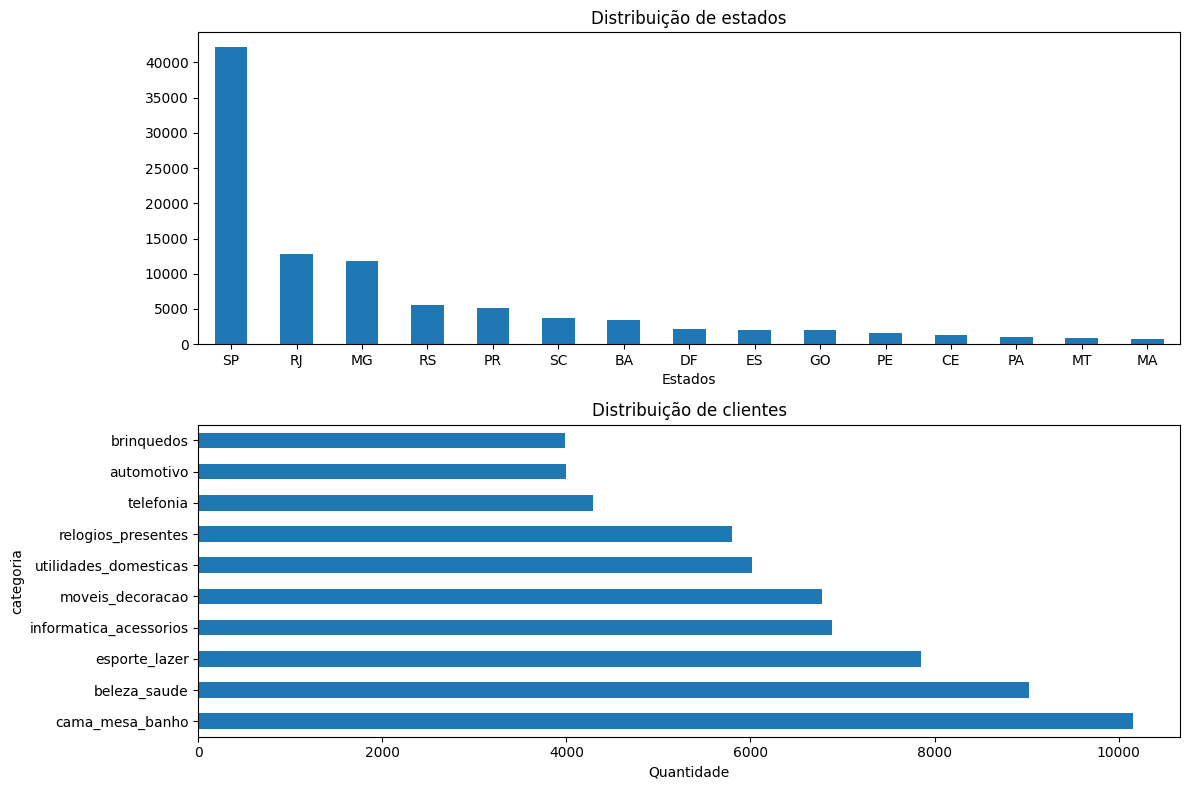

In [129]:
#Distribuições das colunas categóricas
fig, axs = plt.subplots(2, 1, figsize=(12,8))

df['customer_state'].value_counts().head(15).plot(kind='bar', ax=axs[0],xlabel='Estados').tick_params(axis='x',rotation=0)
axs[0].set_title('Distribuição de estados')


df['categoria'].value_counts().head(10).plot(kind='barh', ax=axs[1],xlabel='Quantidade')
axs[1].set_title('Distribuição de clientes')

plt.tight_layout()
plt.show()


In [130]:
# Checagem de valores nulos (NaN)

df.isna().sum()

order_id                            0
product_id                          0
valor_final                         0
categoria                        1460
customer_id                      2229
customer_state                   2229
order_purchase_timestamp         2229
order_estimated_delivery_date    2229
order_delivered_customer_date    2237
dtype: int64

In [131]:
df['categoria'] = df['categoria'].cat.add_categories(['Desconhecido']).fillna('Desconhecido')
df['customer_state'] = df['customer_state'].cat.add_categories(['Desconhecido']).fillna('Desconhecido')

In [132]:
df.isna().sum()

order_id                            0
product_id                          0
valor_final                         0
categoria                           0
customer_id                      2229
customer_state                      0
order_purchase_timestamp         2229
order_estimated_delivery_date    2229
order_delivered_customer_date    2237
dtype: int64